# Comparing Machine Learning Algorithms in a prediction problem

## In this example, you will:

* Explore and clean data to prepare for prediction modeling
* Use Python libraries to view and analyze given data
* Select best feature set for prediction modeling
* Train and validate predict device failure based on the given data
* Compare different models with different Machine Learning algorithm and view the result visually.

### Problem statement

#### Background 
* Features of each cell in the dataset are computed from a digitized image of a breast mass.
#### Goal 
* build a predictive model using machine learning to predict whether a cell is malignant(M) or benign(B).  
* minimize false positives and false negatives. 
* The column you are trying to predict is called diagnosis with M for malignant and B for benign. 
* Find out which features are most relevant for prediction.
* Compare the performance of selected machine algorithms in this prediction problem.
* Visually display the result or intermediate steps whenever possible.

## Steps

**Explore and clean data** to prepapre for *prediction task*

**1** . Import some libraries useful for data analysis

In [2]:
import pandas as pd
import numpy as np

**2** . Import data from a csv file and attach the field names row to the data

In [3]:
df = pd.read_csv("/Users/adilkhan/Documents/CS Fall 16/RA Work/ML_CancerPred/cancer.csv")
df.columns = ("ID","diagnosis","radius_mean","radius_sd_error","radius_worst","texture_mean","texture_sd_error","texture_worst","perimeter_mean","perimeter_sd_error","perimeter_worst","area_mean","area_sd_error","area_worst","smoothness_mean","smoothness_sd_error","smoothness_worst","compactness_mean","compactness_sd_error","compactness_worst","concavity_mean","concavity_sd_error","concavity_worst","concave_points_mean","concave_points_sd_error","concave_points_worst","symmetry_mean","symmetry_sd_error","symmetry_worst","fractal_dimension_mean","fractal_dimension_sd_error","fractal_dimension_worst")

Preview few sample rows of the dataset

How many rows and columns are in this given dataset?

In [70]:
df.shape

(569, 32)

# Bokeh 

In [21]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

y = df['diagnosis']
X = df.drop('diagnosis',axis=1)
x_train_original,x_test_original,y_train_original,y_test_original=train_test_split(X,y,test_size=0.25)

#clf = svm.SVC(kernel = 'rbf')
clf = tree.DecisionTreeClassifier()
clf.fit(x_train_original,y_train_original)
predictions=clf.predict(x_test_original)
print("Accuracy =", accuracy_score(y_test_original,predictions))
tn, fp, fn, tp = confusion_matrix(y_test_original,predictions).ravel()


fruits = ['True Positive', 'False Positive', 'True Negative', 'False Negative']
counts = [tp, fp, tn, fn]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts))

output_notebook()
p = figure(x_range=fruits, plot_height=350, toolbar_location=None, title="Counts")
p.vbar(x='fruits', top='counts', width=0.9, source=source, legend="fruits",
       line_color='white',fill_color=factor_cmap('fruits', palette=Spectral6, factors=fruits))

labels = LabelSet(x='fruits', y='counts', text='counts', level='glyph',
        x_offset=-15, y_offset=0, source=source, render_mode='canvas')
p.add_layout(labels)      
       
p.title.text = "Model Accuracy %f" % accuracy_score(y_test_original,predictions)

show(p)

Accuracy = 0.951048951049


Loading BokehJS ...

In [22]:
from ipywidgets import interact
from bokeh.io import push_notebook

def update(max_depth=1):
    clf = tree.DecisionTreeClassifier(max_depth = max_depth)
    clf.fit(x_train_original,y_train_original)
    predictions=clf.predict(x_test_original)
    print("Accuracy =", accuracy_score(y_test_original,predictions))
    #print(np.unique(predictions))
    tn, fp, fn, tp = confusion_matrix(y_test_original,predictions).ravel()
    source.data =dict(fruits=fruits, counts=[tp, fp, tn, fn])
    p.title.text = "Model Accuracy %f" % accuracy_score(y_test_original,predictions)
    push_notebook()

In [23]:
show(p,notebook_handle = True)

In [20]:
interact(update,max_depth=(1,30))

<function __main__.update>

# Bootstrap Confidence Intervals

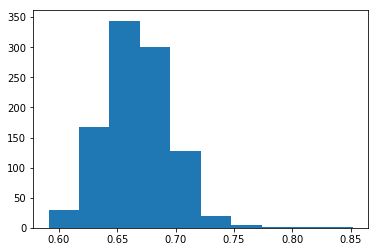

95.0 confidence interval 61.5% and 72.4%


In [102]:
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
data = pd.read_csv("/Users/adilkhan/Documents/CS Fall 16/RA Work/ML_CancerPred/cancer_nohead1.csv")
values = data.values
#df = df.drop('ID',axis=1)
#y = df['diagnosis']
#X = df.drop('diagnosis',axis=1)
# configure bootstrap
n_iterations = 1000
n_size = int(len(df) * 0.50)
# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    # fit model
    model = svm.SVC(kernel='rbf')
    #model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    #print(score)
    stats.append(score)
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# ROC 

0.918136390359


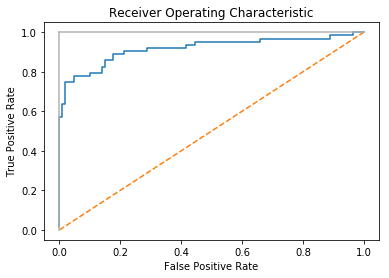

In [3]:
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
# load dataset
df = pd.read_csv("/Users/adilkhan/Documents/CS Fall 16/RA Work/ML_CancerPred/cancer.csv")
df.columns = ("ID","diagnosis","radius_mean","radius_sd_error","radius_worst","texture_mean","texture_sd_error","texture_worst","perimeter_mean","perimeter_sd_error","perimeter_worst","area_mean","area_sd_error","area_worst","smoothness_mean","smoothness_sd_error","smoothness_worst","compactness_mean","compactness_sd_error","compactness_worst","concavity_mean","concavity_sd_error","concavity_worst","concave_points_mean","concave_points_sd_error","concave_points_worst","symmetry_mean","symmetry_sd_error","symmetry_worst","fractal_dimension_mean","fractal_dimension_sd_error","fractal_dimension_worst")
y = df['diagnosis']
X = df.drop('diagnosis',axis=1)
x_train_original,x_test_original,y_train_original,y_test_original=train_test_split(X,y,test_size=0.3,random_state = 1)
clf = LogisticRegression()

# Train model
clf.fit(x_train_original, y_train_original)
y_score = clf.predict_proba(x_test_original)[:,1]
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_original, y_score)
print(metrics.auc(false_positive_rate, true_positive_rate))

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#

# Learning Curve

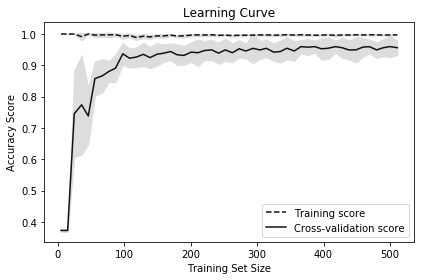

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

df = pd.read_csv("/Users/adilkhan/Documents/CS Fall 16/RA Work/ML_CancerPred/cancer.csv")
df.columns = ("ID","diagnosis","radius_mean","radius_sd_error","radius_worst","texture_mean","texture_sd_error","texture_worst","perimeter_mean","perimeter_sd_error","perimeter_worst","area_mean","area_sd_error","area_worst","smoothness_mean","smoothness_sd_error","smoothness_worst","compactness_mean","compactness_sd_error","compactness_worst","concavity_mean","concavity_sd_error","concavity_worst","concave_points_mean","concave_points_sd_error","concave_points_worst","symmetry_mean","symmetry_sd_error","symmetry_worst","fractal_dimension_mean","fractal_dimension_sd_error","fractal_dimension_worst")
y = df['diagnosis']
X = df.drop('diagnosis',axis=1)

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()




# Validation Curve

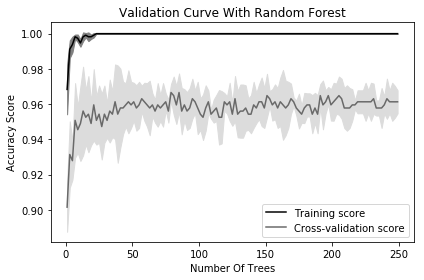

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

df = pd.read_csv("/Users/adilkhan/Documents/CS Fall 16/RA Work/ML_CancerPred/cancer.csv")
df.columns = ("ID","diagnosis","radius_mean","radius_sd_error","radius_worst","texture_mean","texture_sd_error","texture_worst","perimeter_mean","perimeter_sd_error","perimeter_worst","area_mean","area_sd_error","area_worst","smoothness_mean","smoothness_sd_error","smoothness_worst","compactness_mean","compactness_sd_error","compactness_worst","concavity_mean","concavity_sd_error","concavity_worst","concave_points_mean","concave_points_sd_error","concave_points_worst","symmetry_mean","symmetry_sd_error","symmetry_worst","fractal_dimension_mean","fractal_dimension_sd_error","fractal_dimension_worst")
y = df['diagnosis']
X = df.drop('diagnosis',axis=1)

param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Cross Validation pipeline

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import svm

df = pd.read_csv("/Users/adilkhan/Documents/CS Fall 16/RA Work/ML_CancerPred/cancer.csv")
df.columns = ("ID","diagnosis","radius_mean","radius_sd_error","radius_worst","texture_mean","texture_sd_error","texture_worst","perimeter_mean","perimeter_sd_error","perimeter_worst","area_mean","area_sd_error","area_worst","smoothness_mean","smoothness_sd_error","smoothness_worst","compactness_mean","compactness_sd_error","compactness_worst","concavity_mean","concavity_sd_error","concavity_worst","concave_points_mean","concave_points_sd_error","concave_points_worst","symmetry_mean","symmetry_sd_error","symmetry_worst","fractal_dimension_mean","fractal_dimension_sd_error","fractal_dimension_worst")
y = df['diagnosis']
X = df.drop('diagnosis',axis=1)

classifier_pipeline = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
scores = cross_val_score(classifier_pipeline, X, y, cv=3)

print(scores)
print(scores.mean())

[ 0.96842105  0.97894737  0.97883598]
0.97540146663


# Calculating Precision & Recall 
# Generating Text Reports for performance

In [55]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("/Users/adilkhan/Documents/CS Fall 16/RA Work/ML_CancerPred/cancer.csv")
df.columns = ("ID","diagnosis","radius_mean","radius_sd_error","radius_worst","texture_mean","texture_sd_error","texture_worst","perimeter_mean","perimeter_sd_error","perimeter_worst","area_mean","area_sd_error","area_worst","smoothness_mean","smoothness_sd_error","smoothness_worst","compactness_mean","compactness_sd_error","compactness_worst","concavity_mean","concavity_sd_error","concavity_worst","concave_points_mean","concave_points_sd_error","concave_points_worst","symmetry_mean","symmetry_sd_error","symmetry_worst","fractal_dimension_mean","fractal_dimension_sd_error","fractal_dimension_worst")
y = df['diagnosis']
X = df.drop('diagnosis',axis=1)

x_train_original,x_test_original,y_train_original,y_test_original=train_test_split(X,y,test_size=0.3)

clf = RandomForestClassifier(criterion='entropy', random_state=0, n_jobs=-1)
clf.fit(x_train_original,y_train_original)
predictions=clf.predict(x_test_original)
print("Accuracy =", accuracy_score(y_test_original,predictions))
tn, fp, fn, tp = confusion_matrix(y_test_original,predictions).ravel()
print("Recall = TPR = ",tp/(tp+fn) *100)
print("Precision = ",tp/(tp+fp) * 100)

print(classification_report(y_test_original, predictions))
#logit = LogisticRegression()
#cross_val_score(logit, X, y, scoring="precision")



Accuracy = 0.923976608187
Recall = TPR =  92.4242424242
Precision =  88.4057971014
             precision    recall  f1-score   support

          0       0.95      0.92      0.94       105
          1       0.88      0.92      0.90        66

avg / total       0.93      0.92      0.92       171



**3** . Find out if any column(s) has missing values

In [6]:
df.isnull().values.any()

False

**4** . Remove feature columns of data not related to our prediction task.

Let's see how each columns is related to each other.

**5** . Let's find out if there is any redundant column(s) through correlation matrix 

In [7]:
corr_matrix = df.corr()

Let's view that as a heat map: 
*sns.heatmap(corr_matrix, annot=True)*

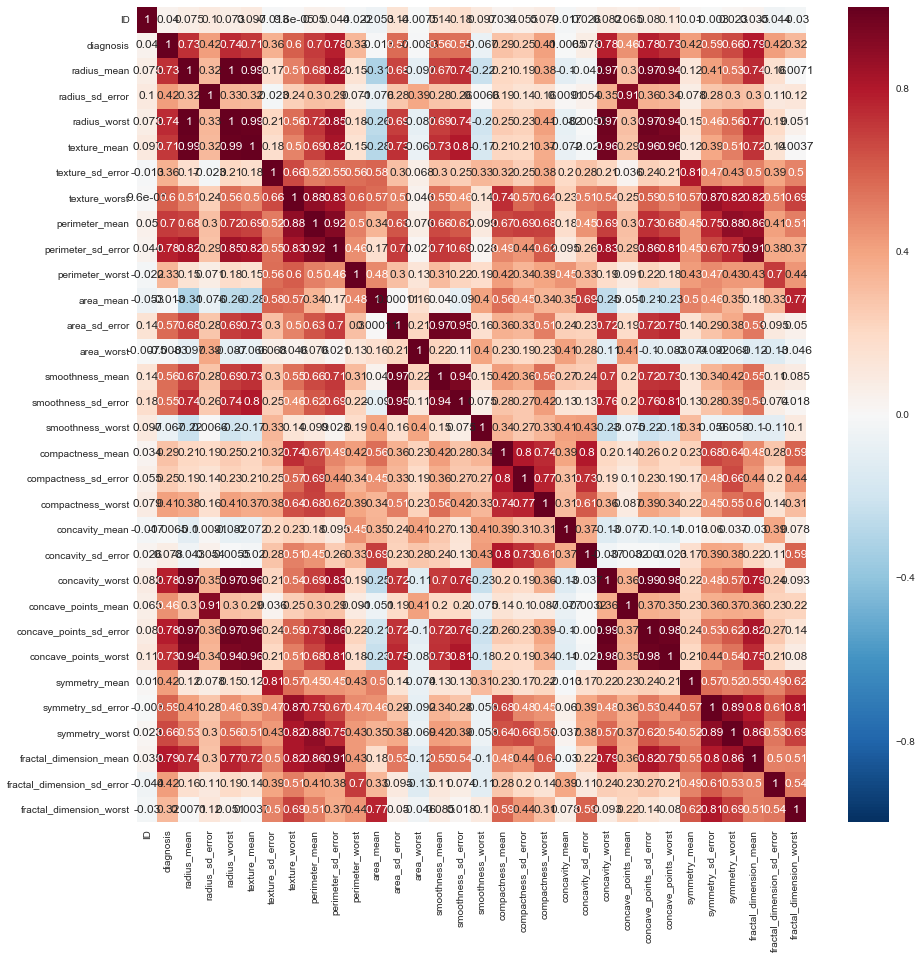

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

What features *,if any,* can be removed from feature selection?

**6**. Compute the mean and median smoothness and compactness for benign and malignant tumors 

In [21]:
print(df.groupby('diagnosis',as_index=False)['smoothness_mean'].mean())
print(df.groupby('diagnosis',as_index=False)['compactness_mean'].mean())

   diagnosis  smoothness_mean
0          0         2.000321
1          1         4.323929
   diagnosis  compactness_mean
0          0          0.021438
1          1          0.032281


Are they *similar* or *different*? Why

**7**. Write a function to generate bootstrap samples of the data

In [10]:
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if n == None:
        n = len(X)

How can you make use of bootstrap samples for this project(put it to work).

### Feature Engineering

**6** . Based on your reasoning, select 2-3 variables that are predictive of a malignant tumor. Explain how you come to this conclusion.

In [58]:
df.corrwith(df.diagnosis)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
y = df['diagnosis']
df1 = df.drop('diagnosis',axis=1)
selector = SelectKBest(chi2, k=5).fit(df, y)
X_new = selector.transform(df)
mask = selector.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, df.columns):
    if bool:
        new_features.append(feature)

print(new_features)


['radius_worst', 'texture_mean', 'smoothness_sd_error', 'concave_points_sd_error', 'concave_points_worst']


Display the relationship among these variables visually.

In [59]:
df1 = pd.DataFrame(df,columns=['diagnosis','radius_worst', 'smoothness_sd_error', 'concave_points_worst', 'concave_points_sd_error'])
#corr_matrix = df1.corr()
#fig,ax = plt.subplots(figsize=(5,5))
#sns.heatmap(corr_matrix, annot=True)
#plt.show()

### Check imbalanced classes

**10** . Check if the target class is imbalanced (more data in one kind than the other )

In [49]:
counts = df.diagnosis.value_counts(ascending=True)
print(counts)

1    212
0    357
Name: diagnosis, dtype: int64


We have more rows with M than B in the target column/or not. **Imbalanced data found/not present**

**11** . Select what features(?) as *feature set* and what(?) as *target* for training our prediction model

In [ ]:
#Target would be diagnosis, and I'm going with the features 'perimeter_sd_error','fractal_dimension_mean','concave_points_sd_error'

### Upsample minority data class(target=?) to be the same size as the majority class data(target=?)

In [60]:
from sklearn.utils import resample
df_majority=df1[df1.diagnosis==0]
df_minority=df1[df1.diagnosis==1]
df_minority_upsampled=resample(df_minority,n_samples=357, random_state=123)
df_up=pd.concat([df_majority,df_minority_upsampled])
y=df_up.diagnosis
X=df_up.drop('diagnosis',axis=1)
#df_up.groupby('diagnosis').count()

### Prediction modeling with machine learning

**12** . Split the given data into 70:30. 
* Use 70% of the data to train our selected machine learning model and
* Validate the trained model with the 30% not available to the model during training

In [61]:
from sklearn.model_selection import train_test_split
x_train_original,x_test_original,y_train_original,y_test_original=train_test_split(X,y,test_size=0.3)

**13** Use SVM alogrithm to build and train the model

In [32]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
#clf = svm.LinearSVC(random_state=0)
clf = svm.SVC(kernel='rbf')
clf.fit(x_train_original,y_train_original)
#clf.score(x_test_original,y_test_original)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


[ 0.62608696  0.62608696  0.62831858  0.62831858  0.62831858]
Accuracy: 0.63 (+/- 0.00)


### Validate trained model with testing data

**14** . Let's use the trained model to predict the testing data it has not seen during training

In [63]:
predictions=clf.predict(x_test_original)

**15** . Prediction accuracy and some other relevant metrics

In [64]:
print("Accuracy =", accuracy_score(y_test_original,predictions))

Accuracy = 0.86511627907


**16** . Let's use the trained model to predict the entire dataset and see how is its prediction accuracy

In [65]:
y_new = df1.diagnosis
x_new = df1.drop('diagnosis',axis=1)
pred1 = clf.predict(x_new)

Prediction accuracy for the entire dataset:

In [66]:
print("Accuracy =", accuracy_score(y_new,pred1))

Accuracy = 0.887521968366


In [ ]:
**17** . Do you see overfitting? If so, how would you minimize it? Show reduced overfitting with your scheme.

In [ ]:
#Model is slightly overfitting.

**18** . Identify the most important predictive variables in this machine learning model. Explain how you pick them.

In [20]:
x_train_original

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
56,857637,19.210,18.57,125.50,1152.0,0.10530,0.12670,0.132300,0.089940,0.1917,...,26.140,28.14,170.10,2145.0,0.16240,0.35110,0.387900,0.20910,0.3537,0.08294
161,8711803,19.190,15.94,126.30,1157.0,0.08694,0.11850,0.119300,0.096670,0.1741,...,22.030,17.81,146.60,1495.0,0.11240,0.20160,0.226400,0.17770,0.2443,0.06251
445,9110720,11.990,24.89,77.61,441.3,0.10300,0.09218,0.054410,0.042740,0.1820,...,12.980,30.36,84.48,513.9,0.13110,0.18220,0.160900,0.12020,0.2599,0.08251
276,8911230,11.330,14.16,71.79,396.6,0.09379,0.03872,0.001487,0.003333,0.1954,...,12.200,18.99,77.37,458.0,0.12590,0.07348,0.004955,0.01111,0.2758,0.06386
28,852973,15.300,25.27,102.40,732.4,0.10820,0.16970,0.168300,0.087510,0.1926,...,20.270,36.71,149.30,1269.0,0.16410,0.61100,0.633500,0.20240,0.4027,0.09876
262,888570,17.290,22.13,114.40,947.8,0.08999,0.12730,0.096970,0.075070,0.2108,...,20.390,27.24,137.90,1295.0,0.11340,0.28670,0.229800,0.15280,0.3067,0.07484
403,9047,12.940,16.17,83.18,507.6,0.09879,0.08836,0.032960,0.023900,0.1735,...,13.860,23.02,89.69,580.9,0.11720,0.19580,0.181000,0.08388,0.3297,0.07834
466,9113455,13.140,20.74,85.98,536.9,0.08675,0.10890,0.108500,0.035100,0.1562,...,14.800,25.46,100.90,689.1,0.13510,0.35490,0.450400,0.11810,0.2563,0.08174
426,907409,10.480,14.98,67.49,333.6,0.09816,0.10130,0.063350,0.022180,0.1925,...,12.130,21.57,81.41,440.4,0.13270,0.29960,0.293900,0.09310,0.3020,0.09646
393,903516,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.281000,0.156200,0.2162,...,26.230,28.74,172.00,2081.0,0.15020,0.57170,0.705300,0.24220,0.3828,0.10070


###  Repeat 13-18 with Naive Bayes, Stochastic Gradient Descent, Random Forest,  and KNN models

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
clf.fit(x_train_original,y_train_original)
predictions=clf.predict(x_test_original)
print("Accuracy for NB =", accuracy_score(y_test_original,predictions))
clf = SGDClassifier()
clf.fit(x_train_original,y_train_original)
predictions=clf.predict(x_test_original)
print("Accuracy for SGD =", accuracy_score(y_test_original,predictions))
clf = RandomForestClassifier(criterion='gini', random_state=0, n_jobs=-1)
clf.fit(x_train_original,y_train_original)
predictions=clf.predict(x_test_original)
print("Accuracy for RF =", accuracy_score(y_test_original,predictions))
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x_train_original,y_train_original)
predictions=clf.predict(x_test_original)
print("Accuracy for KNN =", accuracy_score(y_test_original,predictions))

Accuracy for NB = 0.827906976744
Accuracy for SGD = 0.516279069767
Accuracy for RF = 0.990697674419
Accuracy for KNN = 0.897674418605


### Compare and contrast the advantages and disadvantages of these different machine learning models you used.